**https://www.kaggle.com/datasets/farjanakabirsamanta/skin-cancer-dataset**

In [ ]:
!unzip -u "/content/drive/MyDrive/SKIN CANCER/archive (3).zip" -d "/content/drive/MyDrive/SKIN CANCER/SKINCANCER"

Archive:  /content/drive/MyDrive/SKIN CANCER/archive (3).zip
  inflating: /content/drive/MyDrive/SKIN CANCER/SKINCANCER/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/drive/MyDrive/SKIN CANCER/SKINCANCER/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/drive/MyDrive/SKIN CANCER/SKINCANCER/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/drive/MyDrive/SKIN CANCER/SKINCANCER/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/drive/MyDrive/SKIN CANCER/SKINCANCER/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/drive/MyDrive/SKIN CANCER/SKINCANCER/Skin cancer ISIC The International Skin Imaging Collaboration/Tes

**SKIN CANCER PREDICITION**

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import datetime, os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns
%load_ext tensorboard

**EXTRACTING DATASET**

In [ ]:
train_path = '/content/drive/MyDrive/SKIN CANCER/SKINCANCER/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_path = '/content/drive/MyDrive/SKIN CANCER/SKINCANCER/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

**IMAGE DATA AUGMENTATION**

In [ ]:
train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_batches = train_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

validation_batches = train_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

test_batches = test_datagen.flow_from_directory(
    test_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)



Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
import tensorflow as tf

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=(180, 180, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, padding="same", activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding="same", activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, padding="same", activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(256, 3, padding="same", activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(512, 3, padding="same", activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(9, activation='softmax')
    ])
    return model



In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 batch_normalization_6 (Bat  (None, 178, 178, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 89, 89, 32)        18464     
                                                                 
 batch_normalization_7 (Bat  (None, 89, 89, 32)        128       
 chNormalization)                                                
                                                      

In [ ]:
def train_model():

  model = create_model()
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(train_batches,
            epochs=5,
            validation_data=validation_batches,
            callbacks=[tensorboard_callback])

train_model()

Epoch 1/5
57/57 [==============================] - 1540s 27s/step - loss: 3.4832 - accuracy: 0.3354 - val_loss: 2.7022 - val_accuracy: 0.2252
Epoch 2/5
57/57 [==============================] - 46s 811ms/step - loss: 2.2528 - accuracy: 0.4017 - val_loss: 2.5775 - val_accuracy: 0.1689
Epoch 3/5
57/57 [==============================] - 48s 850ms/step - loss: 1.7760 - accuracy: 0.4201 - val_loss: 2.0910 - val_accuracy: 0.1734
Epoch 4/5
57/57 [==============================] - 47s 829ms/step - loss: 1.5546 - accuracy: 0.4786 - val_loss: 2.6273 - val_accuracy: 0.1689
Epoch 5/5
57/57 [==============================] - 48s 845ms/step - loss: 1.5831 - accuracy: 0.4490 - val_loss: 2.9579 - val_accuracy: 0.1689


In [ ]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

In [ ]:
predictions = model.predict(x=test_batches)
predictions = np.round(predictions)


4/4 [==============================] - 5s 1s/step


In [ ]:
print(model.evaluate(train_batches))

57/57 [==============================] - 32s 567ms/step - loss: 1.9727 - accuracy: 0.2162
[1.9727283716201782, 0.2161559909582138]


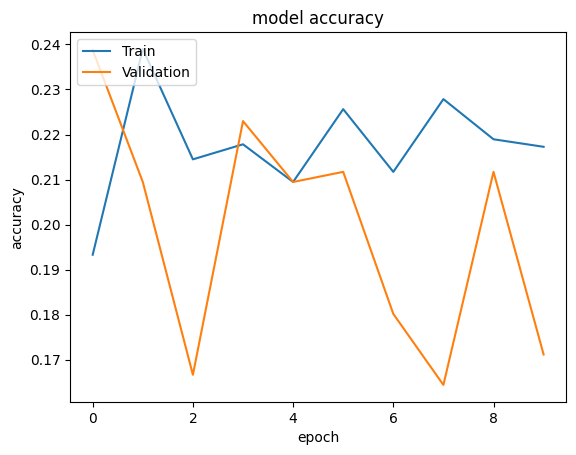

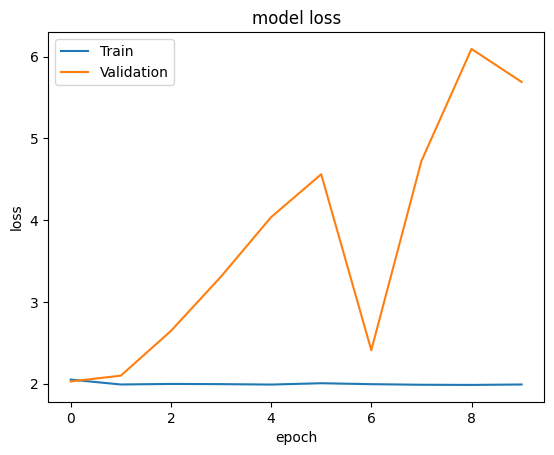

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
base_model=VGG16(input_shape=(180,180,3),
                 include_top=False,
                 weights='imagenet')

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(base_model.output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(9,activation='softmax')(x)

In [ ]:
model=tensorflow.keras.Model(base_model.input,x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
#model compile
model.compile('adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

#training model
history= model.fit(x=train_batches,
                   validation_data=validation_batches,
                   epochs=20,
                   verbose=2)

Epoch 1/20
57/57 - 49s - loss: 2.3358 - accuracy: 0.2635 - val_loss: 1.8368 - val_accuracy: 0.2928 - 49s/epoch - 854ms/step
Epoch 2/20
57/57 - 41s - loss: 1.7580 - accuracy: 0.3554 - val_loss: 1.6670 - val_accuracy: 0.3671 - 41s/epoch - 720ms/step
Epoch 3/20
57/57 - 42s - loss: 1.6637 - accuracy: 0.3872 - val_loss: 1.6463 - val_accuracy: 0.4167 - 42s/epoch - 742ms/step
Epoch 4/20
57/57 - 41s - loss: 1.6068 - accuracy: 0.4362 - val_loss: 1.6479 - val_accuracy: 0.3986 - 41s/epoch - 719ms/step
Epoch 5/20
57/57 - 42s - loss: 1.5585 - accuracy: 0.4513 - val_loss: 1.6928 - val_accuracy: 0.3851 - 42s/epoch - 730ms/step
Epoch 6/20
57/57 - 41s - loss: 1.5303 - accuracy: 0.4490 - val_loss: 1.5872 - val_accuracy: 0.4144 - 41s/epoch - 719ms/step
Epoch 7/20
57/57 - 41s - loss: 1.5029 - accuracy: 0.4574 - val_loss: 1.5656 - val_accuracy: 0.4527 - 41s/epoch - 719ms/step
Epoch 8/20
57/57 - 41s - loss: 1.5170 - accuracy: 0.4685 - val_loss: 1.5773 - val_accuracy: 0.4347 - 41s/epoch - 717ms/step
Epoch 9/

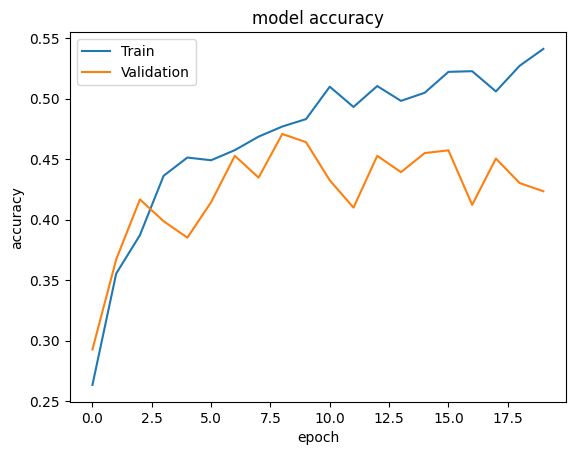

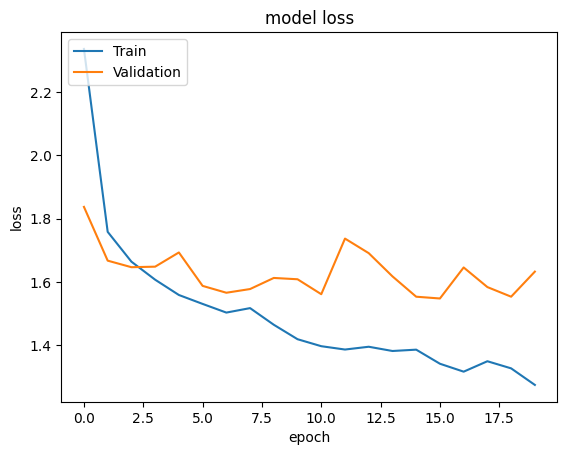

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**RESNET 50**

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
base_model=ResNet50(input_shape=(180,180,3),include_top=False, weights='imagenet', pooling='max')

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout

In [ ]:
x=Flatten()(base_model.output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(9,activation='softmax')(x)

In [ ]:
model=tensorflow.keras.Model(base_model.input,x)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
#model compile
model.compile('adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

#training model
history= model.fit(x=train_batches,
                   validation_data=validation_batches,
                   epochs=20,
                   verbose=2)

Epoch 1/20
57/57 - 48s - loss: 3.8508 - accuracy: 0.1671 - val_loss: 2.0701 - val_accuracy: 0.1689 - 48s/epoch - 848ms/step
Epoch 2/20
57/57 - 42s - loss: 2.0659 - accuracy: 0.1955 - val_loss: 2.0538 - val_accuracy: 0.2072 - 42s/epoch - 738ms/step
Epoch 3/20
57/57 - 42s - loss: 2.0568 - accuracy: 0.2000 - val_loss: 2.0700 - val_accuracy: 0.2072 - 42s/epoch - 745ms/step
Epoch 4/20
57/57 - 41s - loss: 2.0453 - accuracy: 0.1811 - val_loss: 2.0100 - val_accuracy: 0.2072 - 41s/epoch - 715ms/step
Epoch 5/20
57/57 - 41s - loss: 2.0401 - accuracy: 0.2022 - val_loss: 2.0328 - val_accuracy: 0.2072 - 41s/epoch - 722ms/step
Epoch 6/20
57/57 - 41s - loss: 2.0377 - accuracy: 0.2045 - val_loss: 2.0100 - val_accuracy: 0.2072 - 41s/epoch - 713ms/step
Epoch 7/20
57/57 - 42s - loss: 2.0334 - accuracy: 0.2000 - val_loss: 2.0090 - val_accuracy: 0.2072 - 42s/epoch - 738ms/step
Epoch 8/20
57/57 - 41s - loss: 2.0443 - accuracy: 0.1861 - val_loss: 2.0528 - val_accuracy: 0.1959 - 41s/epoch - 714ms/step
Epoch 9/

In [ ]:
print(model.evaluate(train_batches))

57/57 [==============================] - 33s 574ms/step - loss: 2.0143 - accuracy: 0.2061
[2.014335870742798, 0.20612813532352448]


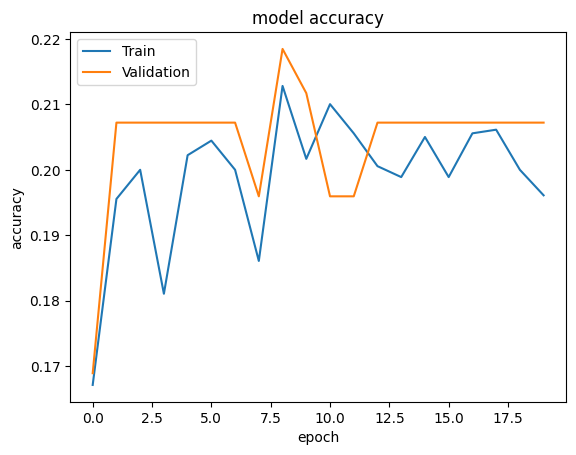

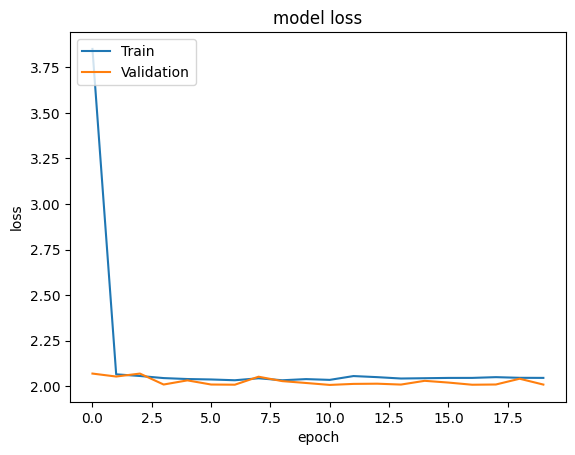

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**ALEXNET**

In [ ]:
model = Sequential()

# layer 1: convolutional layer + max-pooling layer
model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=4, padding='valid', activation='relu', input_shape=(180, 180, 3)))
model.add(MaxPool2D(pool_size=(3, 3), strides=2))

# layer 2: convolutional layer + max-pooling layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=2))

# layers 3-5: three convolutional layers
model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))

# layers 6 - 8: two fully connected hidden layers and one fully connected output layer
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 43, 43, 96)        34944     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 21, 21, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 10, 10, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 384)       885120    
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 384)      

In [ ]:
# model compiling
model.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history= model.fit(x=train_batches,
    validation_data=validation_batches,
    epochs=20,
    verbose=2
)

Epoch 1/20
57/57 - 45s - loss: 2.5531 - accuracy: 0.1922 - val_loss: 2.0149 - val_accuracy: 0.2095 - 45s/epoch - 789ms/step
Epoch 2/20
57/57 - 40s - loss: 2.0350 - accuracy: 0.1877 - val_loss: 2.0138 - val_accuracy: 0.2072 - 40s/epoch - 705ms/step
Epoch 3/20
57/57 - 40s - loss: 2.0260 - accuracy: 0.1928 - val_loss: 2.0128 - val_accuracy: 0.2072 - 40s/epoch - 696ms/step
Epoch 4/20
57/57 - 40s - loss: 2.0223 - accuracy: 0.2061 - val_loss: 2.0156 - val_accuracy: 0.1689 - 40s/epoch - 700ms/step
Epoch 5/20
57/57 - 40s - loss: 2.0267 - accuracy: 0.1900 - val_loss: 2.0152 - val_accuracy: 0.2072 - 40s/epoch - 693ms/step
Epoch 6/20
57/57 - 40s - loss: 2.0221 - accuracy: 0.1994 - val_loss: 2.0169 - val_accuracy: 0.2072 - 40s/epoch - 702ms/step
Epoch 7/20
57/57 - 40s - loss: 2.0243 - accuracy: 0.2006 - val_loss: 2.0131 - val_accuracy: 0.2072 - 40s/epoch - 699ms/step
Epoch 8/20
57/57 - 39s - loss: 2.0186 - accuracy: 0.1911 - val_loss: 2.0179 - val_accuracy: 0.1689 - 39s/epoch - 688ms/step
Epoch 9/

In [ ]:
print(model.evaluate(train_batches))

57/57 [==============================] - 32s 553ms/step - loss: 2.0174 - accuracy: 0.2061
[2.0173733234405518, 0.20612813532352448]


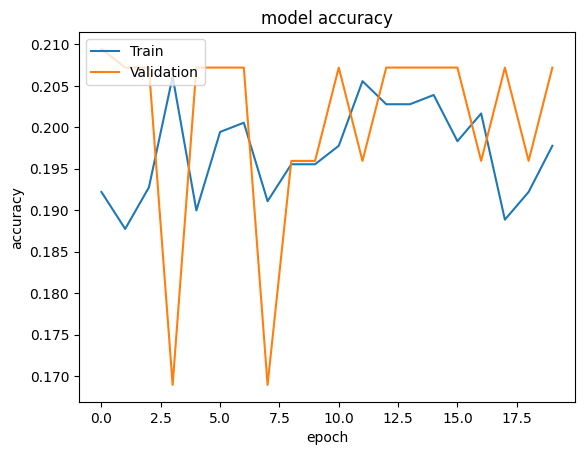

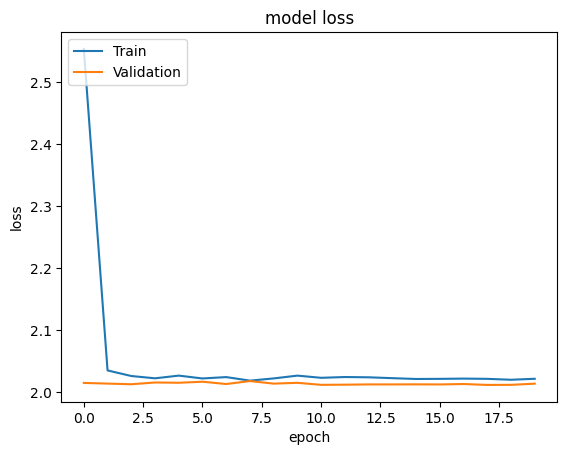

In [ ]:

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()